# Project 2 - creating neural net from scratch

The objective of this project is to design a mini “deep learning framework” using only pytorch’s tensor operations and the standard math library, hence in particular without using autograd or the neural-network modules.

Your framework should import only `torch.FloatTensor` and `torch.LongTensor` from pytorch, and use no pre-existing neural-network python toolbox.


-------------
# /////////////TODO/////////////

- fix linear regression model
- Make Linear() customizable with epsilon or another initialization 1e-6 is a bit small normal
- start on the report
- create plot of decisionline with model and data as input (for better debugging and insight)
- create Relu()-module
- create proper MSEloss()-module
- create train_model() or similar   >>>CHECK<<<
- create split_dataset() or similar >>>CHECK<<<
- create the net they request

-------------------------------------
-------------------------------------

In [1]:
# Definitely allowed imports
import math
import torch
from torch import FloatTensor, LongTensor, Tensor
# additional imports
import matplotlib.pyplot as plt
import matplotlib
import numpy as np


# our own written code
import helpers as HL

# jupyter magic
%load_ext autoreload
%autoreload 2

## Generate datasets

Generate a training and a test set of 1,000 points sampled uniformly in [0,1]2, each with a
label 0 if outside the disk of radius 1/ 2π and 1 inside,

torch.Size([1000, 2]) torch.Size([1000, 1])


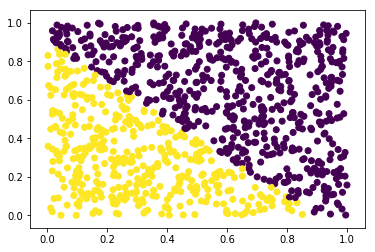

In [2]:
linear_inputs, linear_targets = HL.generate_linear_data()
print(linear_inputs.shape, linear_targets.shape)

# plot the data
plt.scatter(linear_inputs[:,0].numpy(), linear_inputs[:,1].numpy(), c=np.squeeze(linear_targets.numpy()))
plt.show()

torch.Size([1000, 2]) torch.Size([1000, 1])


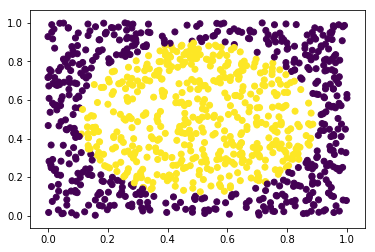

In [3]:
inputs, targets = HL.generate_disc_data(n=1000)
print(inputs.shape, targets.shape)

# plot the data
plt.scatter(inputs[:,0].numpy(), inputs[:,1].numpy(), c=np.squeeze(targets.numpy()))
plt.show()

## Build a network
...with `2` input units, `2` output units, `3` hidden layers of `25` units

Some modules may requires additional methods, and some modules may keep track of information
from the forward pass to be used in the backward.
You should implement at least the modules: `Linear` (fully connected layer), `ReLU` , `Tanh` , `Sequential`  to combine several modules in basic sequential structure, and LossMSE to compute the MSE loss.

### Splitting dataset

In [4]:
# comment out if you want non-linear dataset:
inputs, targets = linear_inputs, linear_targets

# split the dataset into train and and test data
train_inputs, train_targets, test_inputs, test_targets = HL.split_dataset(inputs, targets, train_perc=0.7)
print(train_inputs.size(), train_targets.size(), test_inputs.size(), test_targets.size())

torch.Size([700, 2]) torch.Size([700, 1]) torch.Size([300, 2]) torch.Size([300, 1])


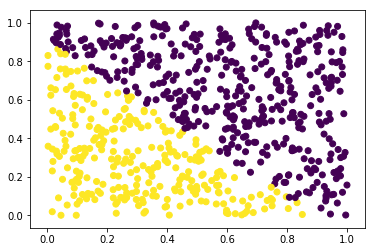

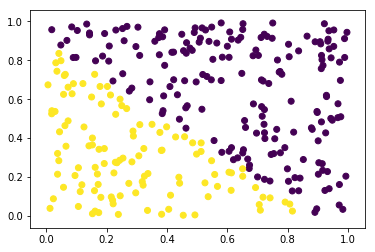

In [24]:
# plot the data
plt.scatter(train_inputs[:,0].numpy(), train_inputs[:,1].numpy(), c=np.squeeze(train_targets.numpy()))
plt.show()

plt.scatter(test_inputs[:,0].numpy(), test_inputs[:,1].numpy(), c=np.squeeze(test_targets.numpy()))
plt.show()

# Training

In [46]:
def train_model(train_inputs, train_targets, test_inputs, test_targets, model, learning_rate=0.001, epochs=100, debug=False):
    """
    Trains the model and returns model and train and test error
    
    ///TODO:
    - make criterion an input
    """
    # define optimizer
    sgd = HL.SGD(model.param(), lr=learning_rate)
    
    # constants
    nb_train_samples = train_inputs.size(0)
    nb_classes = train_targets.size(1)
    input_dim = train_inputs.size(1)
    
    
    # training in epochs
    test_error_list = []
    train_error_list = []

    for epoch in range(epochs):
        
        # Training -------------------------------------------------------------------------------
        acc_loss = 0
        nb_train_errors = 0
        # iterate through samples and accumelate derivatives
        for n in range(0, nb_train_samples):
            #clear gradiants 1.(outside loop with samples = GD) 2.(inside loop with samples = SGD)
            sgd.zero_grad()

            output = model.forward(train_inputs[n])
            prediction = output > 0.5 

            if int(train_targets[n]) != int(prediction) : nb_train_errors += 1
            acc_loss = acc_loss + HL.loss(output, train_targets[n])
            dl_dloss = HL.dloss(output, train_targets[n])
            if debug:
                print("output: ", output)
                print("pred: ", prediction)
                print("target: ", targets[n])
                print("loss: ", HL.loss(output, train_targets[n]))
                print("dloss: ", HL.dloss(output, train_targets[n]))
            
            model.backward(dl_dloss)

            # Gradient step 1.(outside loop with samples = GD) 2.(inside loop with samples = SGD)
            sgd.step()
            
        train_error_list.append((100 * nb_train_errors) / train_inputs.size(0))


        # Testing --------------------------------------------------------------------------------
        nb_test_errors = 0
        
        for n in range(0, test_inputs.size(0)):
            output = model.forward(test_inputs[n])
            prediction = output > 0.5 
            
            if int(test_targets[n]) != int(prediction) : nb_test_errors += 1

        if epoch%(epochs/10) == 0:
            print('{:d} acc_train_loss {:.02f} acc_train_error {:.02f}% test_error {:.02f}%'
              .format(epoch,
                      acc_loss,
                      (100 * nb_train_errors) / train_inputs.size(0),
                      (100 * nb_test_errors) / test_inputs.size(0)))
        test_error_list.append((100 * nb_test_errors) / test_inputs.size(0))

    return model, train_error_list, test_error_list


In [47]:
##---------------------------------------------

In [48]:
# useful information
nb_train_samples = train_inputs.size(0)
nb_classes = train_targets.size(1)
input_dim = train_inputs.size(1)
print("nb_train_samples: ", nb_train_samples)
print("nb_classes: ", nb_classes)
print("input_dim: ", input_dim)

# define model and optimizer
model = HL.Linear_regression_model(input_dim=input_dim, output_dim=nb_classes)
print("model.parameters: ", model.param())

model, train_error_list, test_error_list = train_model(train_inputs, train_targets, test_inputs, test_targets, 
                                                       model, learning_rate=0.01, epochs=100)


nb_train_samples:  700
nb_classes:  1
input_dim:  2
model.parameters:  [[(
-0.2236 -0.6382
[torch.FloatTensor of size 1x2]
, 
 0.0000e+00 -3.6893e+19
[torch.FloatTensor of size 1x2]
), (
 1.2543
[torch.FloatTensor of size 1]
, 
 0
[torch.FloatTensor of size 1]
)]]
0 acc_train_loss 73.40 acc_train_error 9.43% test_error 6.67%
10 acc_train_loss 59.25 acc_train_error 3.57% test_error 1.67%
20 acc_train_loss 59.25 acc_train_error 3.57% test_error 1.67%
30 acc_train_loss 59.25 acc_train_error 3.57% test_error 1.67%
40 acc_train_loss 59.25 acc_train_error 3.57% test_error 1.67%
50 acc_train_loss 59.25 acc_train_error 3.57% test_error 1.67%
60 acc_train_loss 59.25 acc_train_error 3.57% test_error 1.67%
70 acc_train_loss 59.25 acc_train_error 3.57% test_error 1.67%
80 acc_train_loss 59.25 acc_train_error 3.57% test_error 1.67%
90 acc_train_loss 59.25 acc_train_error 3.57% test_error 1.67%


## Analysing results

In [30]:
print("weigths: ", model.fc1.weight)
print("bias: ", model.fc1.bias)

weigths:  
-0.9506 -1.0412
[torch.FloatTensor of size 1x2]

bias:  
 1.3785
[torch.FloatTensor of size 1]



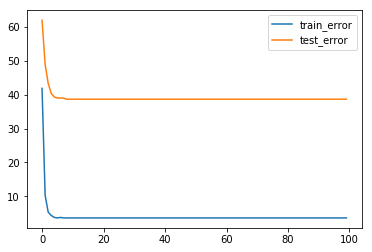

In [26]:
#plotting
plt.plot(train_error_list)
plt.plot(test_error_list)
plt.legend(['train_error', 'test_error'], loc='upper right')
plt.show()

## Making Sequential()

In [ ]:
class Sequential(Module):
    
    def __init__(self, *args):
        super().__init__()
        sel.children
        for module in enumerate(args):
            self.add_module()
        
    
    def add_module(self):
        
    
    def forward ( self , * input ) :
        """ `forward` should get for input, and returns, a tensor or a tuple of tensors """
        raise NotImplementedError
        
    def backward ( self , * gradwrtoutput ) :
        """
        `backward` should get as input a tensor or a tuple of tensors containing the gradient of the loss 
        with respect to the module’s output, accumulate the gradient wrt the parameters, and return a 
        tensor or a tuple of tensors containing the gradient of the loss wrt the module’s input.
        """
        raise NotImplementedError
        
    def param ( self ) :
        """ 
        `param` should return a list of pairs, each composed of a parameter tensor, and a gradient tensor 
        of same size. This list should be empty for parameterless modules (e.g. ReLU). 
        """
        return []